## Train QuickNAT
Working code! Details coming soon!

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

from quickNat_pytorch.quickNAT import quickNAT
from quickNat_pytorch.data_utils import get_imdb_data

#torch.set_default_tensor_type('torch.FloatTensor')
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
train_data, test_data = get_imdb_data()
print("Train size: %i" % len(train_data))
print("Test size: %i" % len(test_data))

(3240, 256, 256)
27.0
0.0
Train size: 1890
Test size: 1350


In [70]:
from quickNat_pytorch.quickNAT import quickNAT
from quickNat_pytorch.solver import Solver


train_loader = torch.utils.data.DataLoader(train_data, batch_size=2, shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(test_data, batch_size=2, shuffle=False, num_workers=4)

param ={
        'num_channels':1,
        'num_filters':64,
        'kernel_h':5,
        'kernel_w':5,
        'kernel_c': 1,
        'stride_conv':1,
        'pool':2,
        'stride_pool':2,
        'num_class':28,
        'se_block' : True,
        'drop_out' : 0.2
    }

exp_dir_name = 'Exp02_try3'

quicknat_model = quickNAT(param)
solver = Solver(optim_args={"lr": 1e-2})
solver.train(quicknat_model, train_loader, val_loader, log_nth=1, num_epochs=10, exp_dir_name=exp_dir_name)

START TRAIN.
[Iteration : 0] : 5.130951881408691
[Iteration : 50] : 1.2089707851409912
[Iteration : 100] : 1.3899102210998535
[Iteration : 150] : 1.242574691772461
[Iteration : 200] : 1.3760236501693726
[Iteration : 250] : 1.1662354469299316
[Iteration : 300] : 1.0232454538345337
[Iteration : 350] : 1.0619194507598877
[Iteration : 400] : 1.2011926174163818
[Iteration : 450] : 0.9340900778770447
[Iteration : 500] : 0.9832717180252075
[Iteration : 550] : 1.074634313583374
[Iteration : 600] : 0.9743790626525879
[Iteration : 650] : 0.9398012161254883
[Iteration : 700] : 0.9062271118164062
[Iteration : 750] : 0.8049982786178589
[Iteration : 800] : 0.9385005235671997
[Iteration : 850] : 0.9322208762168884
[Iteration : 900] : 0.918230414390564
[Epoch : 0/1] : 0.9215173721313477
Saving model... models/Exp02_try3/quicknat_epoch1.model
FINISH.


## Save the Model

When you are satisfied with your training, you can save the model.

In [71]:
quicknat_model.save("models/Exp02_try3/quicknat_model.model")

Saving model... models/Exp02_try3/quicknat_model.model


# Deploy Model on Test Data

In [72]:
test_data.X.shape

(1350, 1, 256, 256)

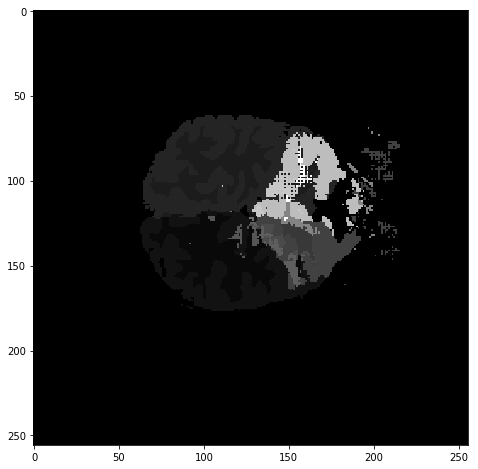

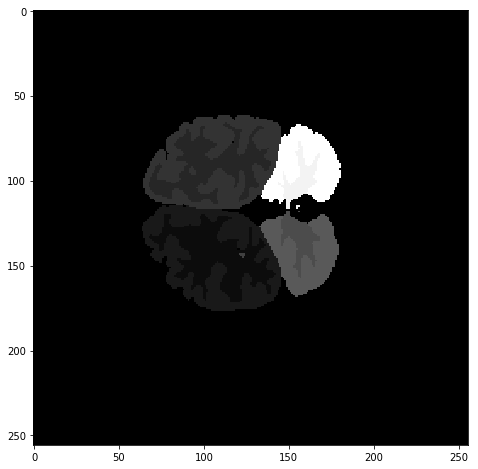

In [80]:
import matplotlib.pyplot as plt

quick_model = torch.load('models/Exp02_try3/quicknat_epoch1.model')
quick_model = quick_model.eval()
with torch.no_grad():
    test_input = Variable(torch.Tensor(test_data.X[200:201]).cuda())
quick_model.enable_test_dropout()
out = quick_model(test_input)
max_val, idx = torch.max(out,1)
idx = idx.data.cpu().numpy()
idx = np.squeeze(idx)
plt.imshow(idx)
plt.show()

img_test = test_data.y[200:201]
img_test = np.squeeze(img_test)
plt.imshow(img_test)
plt.show()